<h3 style="text-align: center;"><strong>Linear regression with gradient descent</strong></h3>

Python aplication based on:<br>
<a href ="https://statquest.org/">StatQuest</a><br>
<a href="https://www.youtube.com/watch?v=sDv4f4s2SB8&list=PLblh5JKOoLUICTaGLRoHQDuF_7q2GfuJF&index=32&t=0s">Gradient Descent, Step-by-Step</a>
<br><br>

<p>Let (1.4 , 0.5) , (1.9 , 2.3) , (3.2 , 2.9) be three points.</p>
<p>Using math formula for linear regression (obtained from minimizing sum of squared residuals), will have:</p>
<p>$m=\frac { \overline { xy } -\overline { x } \cdot \overline { y }  }{ \overline { { x }^{ 2 } } -     { \left( \overline { x }  \right)  }^{ 2 } }\quad$</p>
<p>$n=\bar{y}-m\bar{x}$</p>

In [1]:
class reg_lin:
    def __init__(self,data):
        self.data = data
        self.line()

    def line(self):
        #transpose data
        x, y = self.data.T

        xy = np.multiply(x,y)
        xx = np.multiply(x,x)

        x_m = np.mean(x)
        y_m = np.mean(y)
        xy_m = np.mean(xy)
        xx_m = np.mean(xx)

        m = (xy_m - x_m * y_m )/(xx_m - x_m * x_m)
        n = y_m - m * x_m

        self.m = m
        self.n = n

        return(m,n)

m(slope)= 0.641025641025641 n(y-intercept)= 0.9487179487179489


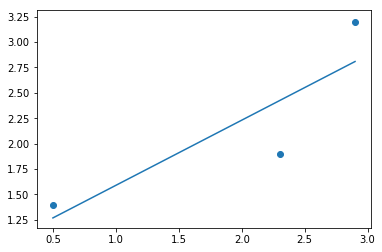

In [16]:
import numpy as np
from matplotlib import pyplot as plt

data = np.array([
    [0.5,1.4],
    [2.3,1.9],
    [2.9,3.2],
])

x, y = data.T
plt.scatter(x,y)

line=reg_lin(data)
m=line.m
n=line.n
print("m(slope)=",m,"n(y-intercept)=",n)
#plt.xlim(-0.05,1.05)
#plt.ylim(-0.05,1.05)
#x = np.arange(-10, 10, 0.1)
plt.plot(x, m*x+n)

plt.show()

<p><u>1st Stage - determine only y-intercept, considering slope as known</u></p>
<br>
<p>The sum of squared residuals is the Loss(error) Function</p>
<p>a)m-slope line is known(value calculated above)</pm>
<p>b)n-y intercept is what we are searching</p>

<p>$Sum_{squares}=(1.4-(m\cdot0.5+n))^{2}+$</p>
<p>$\quad\quad\quad\quad=(1.9-(m\cdot2.3)+n)^{2}+$</p>
<p>$\quad\quad\quad\quad=(3.2-(m\cdot2.9)+n)^{2}+$</p>

<p>Below is the gradient(two or more derivatives of the same function) of the sum of squared residuals:</p>

<p>$\frac{d}{dn}Sum_{squares}=-2(1.4-(m\cdot0.5+n))+$</p>
<p>$\quad\quad\quad\quad\quad-2(1.9-(m\cdot2.3+n))+$</p>
<p>$\quad\quad\quad\quad\quad-2(3.2-(m\cdot2.9+n))$</p>

<p>$\frac{d}{dm}Sum_{squares}=-2\cdot0.5(1.4-(m\cdot0.5+n))+$</p>
<p>$\quad\quad\quad\quad\quad-2\cdot2.3(1.9-(m\cdot2.3+n))+$</p>
<p>$\quad\quad\quad\quad\quad-2\cdot2.9(3.2-(m\cdot2.9+n))$</p>

<p>The lowest sum of squared residuals will happen when the derivative of this function will be (almost) 0.</p>
<p>To determine the n (m being known) we will use only the 1st derivative.</p>

In [3]:
#let slope be m
#let n(y-intercept) be 0 (some random value)
def prediction(x,n):
    return m*x+n
    
#sum of squared residuals
#error(loss)function 
def sum_squares(n):
    S = 0
    for i in range(len(data)):
        x = data[i][0]
        y = data[i][1]    
        #observed - predicted
        residual = y - prediction(x,n)
        S += residual**2 
    return S     
        
#derivative with respect to n(y-intercept): d/dn (sum_squares) 
def deriv_sum_squares(n):
    D = 0
    for i in range(len(data)):
        x = data[i][0]
        y = data[i][1] 
        d = -2*(y-prediction(x,n))
        D += d
    return D    

def train(learn_rate = 0.1,nr_epochs = 50):

    accuracy = 0.001
    
    #initial random value (say from 1 to 10)
    #n=np.rint((np.random.rand(1)[0]*10))
    n = 0
    
    #draw n-sum of squares points
    ss_list = []
    #just for drawing tangents
    d_list = []
    
    for i in range(nr_epochs):
        d = deriv_sum_squares(n)
        step_size = d * learn_rate
        n = n - step_size
    
        ss=sum_squares(n)
        print(n,d,ss)
        ss_list.append([n,ss])
        d_list.append(d)
        
        if(np.absolute(d)<accuracy):
            return(n,d,ss_list,d_list)
        
    return(n,d,ss_list,d_list)

n,d,ss_list,d_list = train(learn_rate = 0.1,nr_epochs = 100)        

print("\nn(y intercept)=",n)   

0.5692307692307693 -5.692307692307693 0.8766469428007893
0.7969230769230771 -2.2769230769230777 0.5137404339250491
0.8880000000000002 -0.9107692307692314 0.45567539250493116
0.9244307692307695 -0.3643076923076922 0.4463849858777118
0.9390030769230772 -0.14572307692307618 0.44489852081735726
0.9448320000000002 -0.05828923076923065 0.4446606864077004
0.9471635692307695 -0.02331569230769226 0.44462263290215487
0.9480961969230771 -0.009326276923076193 0.4446165443412676
0.9484692480000002 -0.0037305107692304773 0.44461557017152614
0.9486184684307695 -0.0014922043076923686 0.44461541430436735
0.9486781566030772 -0.0005968817230770362 0.444615389365622

n(y intercept)= 0.9486781566030772


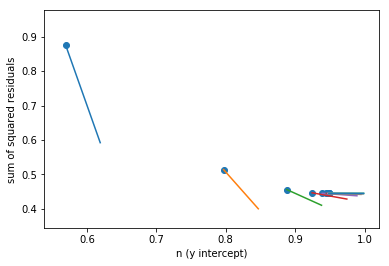

In [15]:
ss_array = np.array(ss_list)
x, y = ss_array.T
plt.xlabel("n (y intercept)")
plt.ylabel("sum of squared residuals")
plt.scatter(x,y) 

smin = np.min(ss_array, axis=0)
smax = np.max(ss_array, axis=0)
xmin=smin[0]
xmax=smax[0]
ymin=smin[1]
ymax=smax[1]

d_list=np.array(d_list)   
for i in range(len(d_list)):
    x = ss_array[i][0]
    y = ss_array[i][1]
    m = d_list[i]
    n = y - m*x
    xt = np.arange(x, x+0.05, 0.001)
    plt.ylim(ymin-0.1,ymax+0.1)
    plt.plot(xt, m*xt+n)

<p><u>2nd Stage: determining both the y-intercept and the slope</u></p>

In [5]:
def prediction2(x,m,n):
    return m*x+n

#derivative with respect to n(y-intercept): d/dn (sum_squares) 
def deriv_sum_squares_dn(m,n):
    D = 0
    for i in range(len(data)):
        x = data[i][0]
        y = data[i][1] 
        d = -2*(y-prediction2(x,m,n))
        D += d
    return D 

#derivative with respect to m(slope): d/dm (sum_squares) 
def deriv_sum_squares_dm(m,n):
    D = 0
    for i in range(len(data)):
        x = data[i][0]
        y = data[i][1] 
        d = -2*x*(y-prediction2(x,m,n))
        D += d
    return D 

n = 0
m = 1

def train2(learn_rate = 0.01,nr_epochs = 50):

    accuracy = 0.0001
    
    n = 0
    m = 1

    for i in range(nr_epochs):
        dn = deriv_sum_squares_dn(m,n)
        #print(dn)
                
        dm = deriv_sum_squares_dm(m,n)
        #print(dm)
        
        step_size_dn = dn * learn_rate
        step_size_dm = dm * learn_rate
        
        n = n - step_size_dn
        m = m - step_size_dm

        #print(n,m)
        
        #print(step_size_dn,d1,n,step_size_dm,d2,m)
        #print(dm,step_size_dm,dn,step_size_dn,m,n)
        
        if( (np.absolute(step_size_dn)<accuracy) and (np.absolute(step_size_dm)<accuracy) ):
            return(m,n)
        
    return(m,n)

m,n = train2(learn_rate = 0.01,nr_epochs = 1000) 
print(m,n)

#print(deriv_sum_squares_dn(0))
#print(deriv_sum_squares_dm(1))

0.644674637445238 0.9401533573500812
